In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

# Import Data

In [2]:
data = pd.read_csv('features_data.csv', delimiter=',', decimal='.')

In [3]:
time = data['time']
time_1 = data['time_1']
time_2 = data['time_2']
time_3 = data['time_3']
jerk = data['mean_jerk_vector']
jerk_1 = data['mean_jerk_1_vector']
jerk_2 = data['mean_jerk_2_vector']
jerk_3 = data['mean_jerk_3_vector']
jerk_y = data['mean_jerk_y']
jerk_y_1 = data['mean_jerk_1_y']
jerk_y_2 = data['mean_jerk_2_y']
jerk_y_3 = data['mean_jerk_3_y']
peaks = data['pos_peaks']
peaks_1 = data['pos_peaks_1']
peaks_2 = data['pos_peaks_2']
peaks_3 = data['pos_peaks_3']
grasping_performance = data['grasping_performance']
grasping_exploratory = data['grasping_exploratory']
height = data['height']
level = data['level']
experience = data['experience']
training = data['training']
gender = data['gender']
person_name = data['person_name']
unique_colors = sns.color_palette('tab20')

# Time and Jerk Vector

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0]


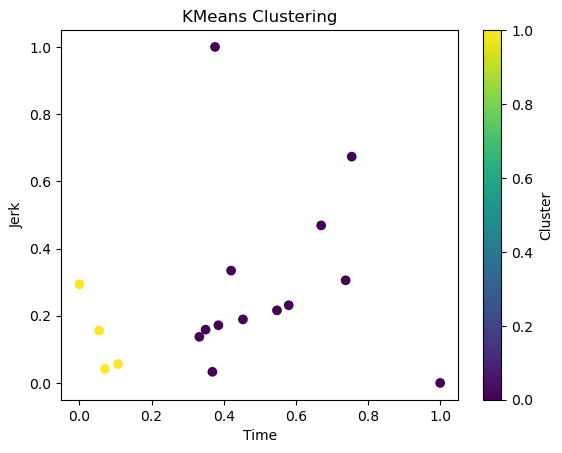

In [4]:
def plotKMeans(data, cluster):
    kmeans = KMeans(n_clusters=cluster, random_state=0, n_init='auto').fit(data)
    print(kmeans.labels_)

    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('Time')
    plt.ylabel('Jerk')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

data = np.array([[t, j] for t, j in zip(time, jerk)])
data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_1)])
data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_3)])
data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_3)])

plotKMeans(data, 2)

Calculate gender based climbers per cluster and plot the clusters with the gender information

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 6 males
Cluster 1: 2 females, 2 males


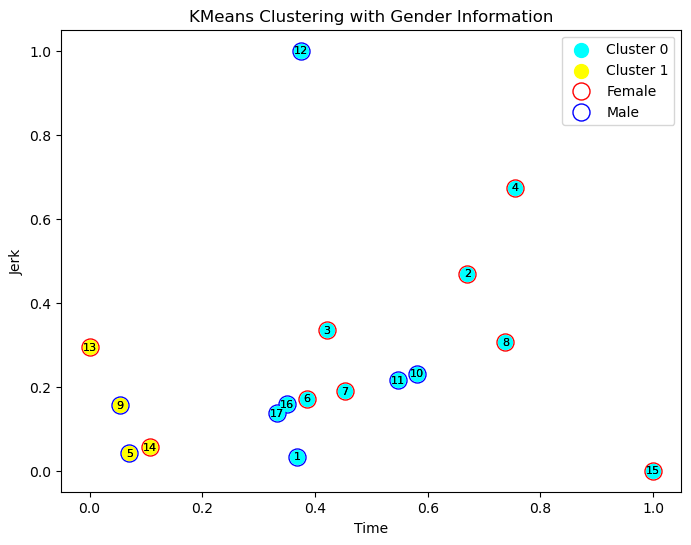

In [5]:
def plotGender2Clusters(data, xlabel, ylabel):
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)

    female_counts = {}
    male_counts = {}

    # Iterate over each cluster
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]

        female_counts[cluster_label] = np.sum((gender == 'female') & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 'male') & (kmeans.labels_ == cluster_label))

    # Print
    for cluster_label in range(2):
        print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

    # Plot
    colors = ['cyan', 'yellow']
    plt.figure(figsize=(8, 6))
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

        # Annotate each point with person's name
        for i, point in enumerate(data):
            numeric_name = person_name[i][1:]
            plt.text(point[0], point[1], numeric_name, fontsize=8, ha='center', va='center')

    # Add Gender information
    plt.scatter(data[(gender == 'female'), 0], data[(gender == 'female'), 1], c='white', marker='o', edgecolors='red', label='Female', s=150, zorder=0)
    plt.scatter(data[(gender == 'male'), 0], data[(gender == 'male'), 1], c='white', marker='o', edgecolors='blue', label='Male', s=150, zorder=0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('KMeans Clustering with Gender Information')
    plt.legend()
    plt.show()

plotGender2Clusters(data, 'Time', 'Jerk')


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


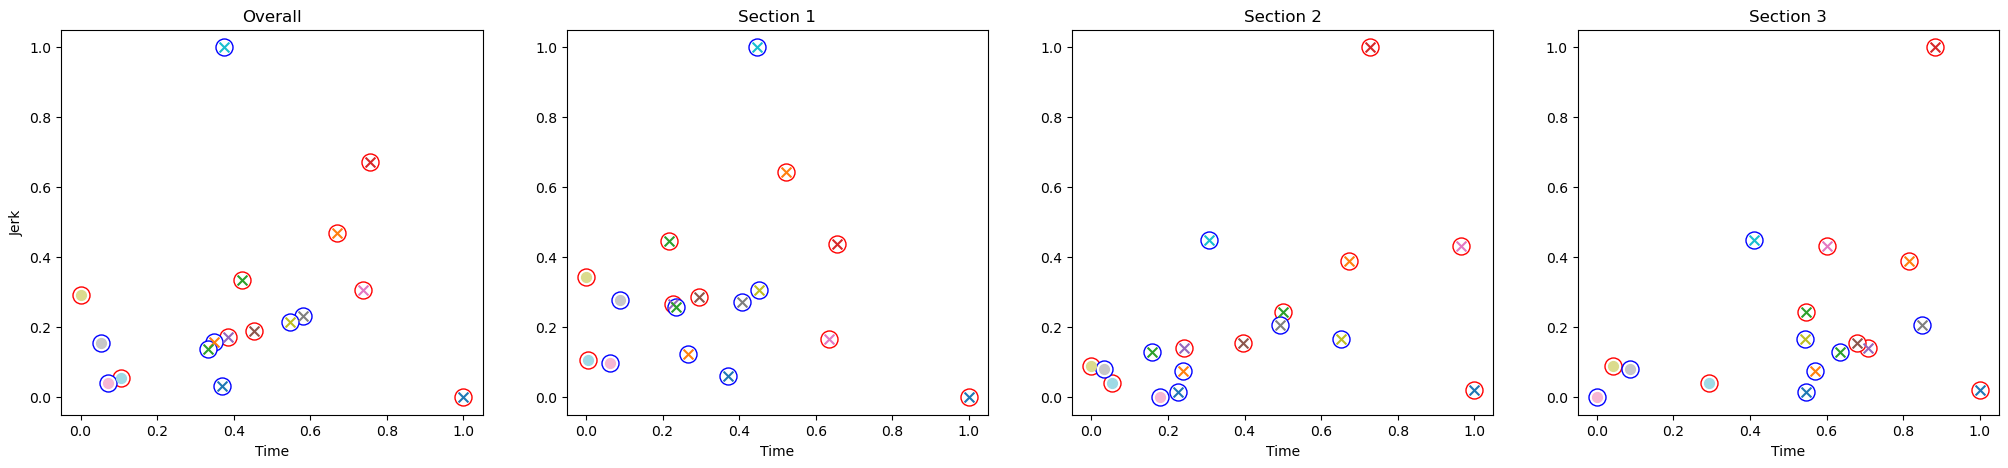

In [6]:
def plotSectionsCluster(overall, section_1, section_2, section_3, xlabel, ylabel):
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(overall)
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))

    datasets = [overall, section_1, section_2, section_3]
    
    for j, dataset in enumerate(datasets):
        c = 0
        for cluster_label in range(2):
            markers = ['x', 'o']
            cluster_data = dataset[kmeans.labels_ == cluster_label]
            for i, point in enumerate(cluster_data):
                color_index = (i + c) % len(unique_colors)  
                axs[j].scatter(point[0], point[1], marker=markers[cluster_label], color=unique_colors[color_index], s=50)
                c += 1

            axs[j].scatter(dataset[(gender == 'female') & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 'female') & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='red', linewidth=1, facecolors='none', s=150, label='Female', zorder=0)
            axs[j].scatter(dataset[(gender == 'male') & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 'male') & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='blue', linewidth=1, facecolors='none', s=150, label='Male', zorder=0)

        axs[j].set_xlabel(xlabel)

    axs[0].set_ylabel(ylabel)
    axs[0].set_title('Overall')  
    axs[1].set_title('Section 1') 
    axs[2].set_title('Section 2') 
    axs[3].set_title('Section 3')          
    plt.show()

plotSectionsCluster(data, data_1, data_2, data_3, 'Time', 'Jerk')


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


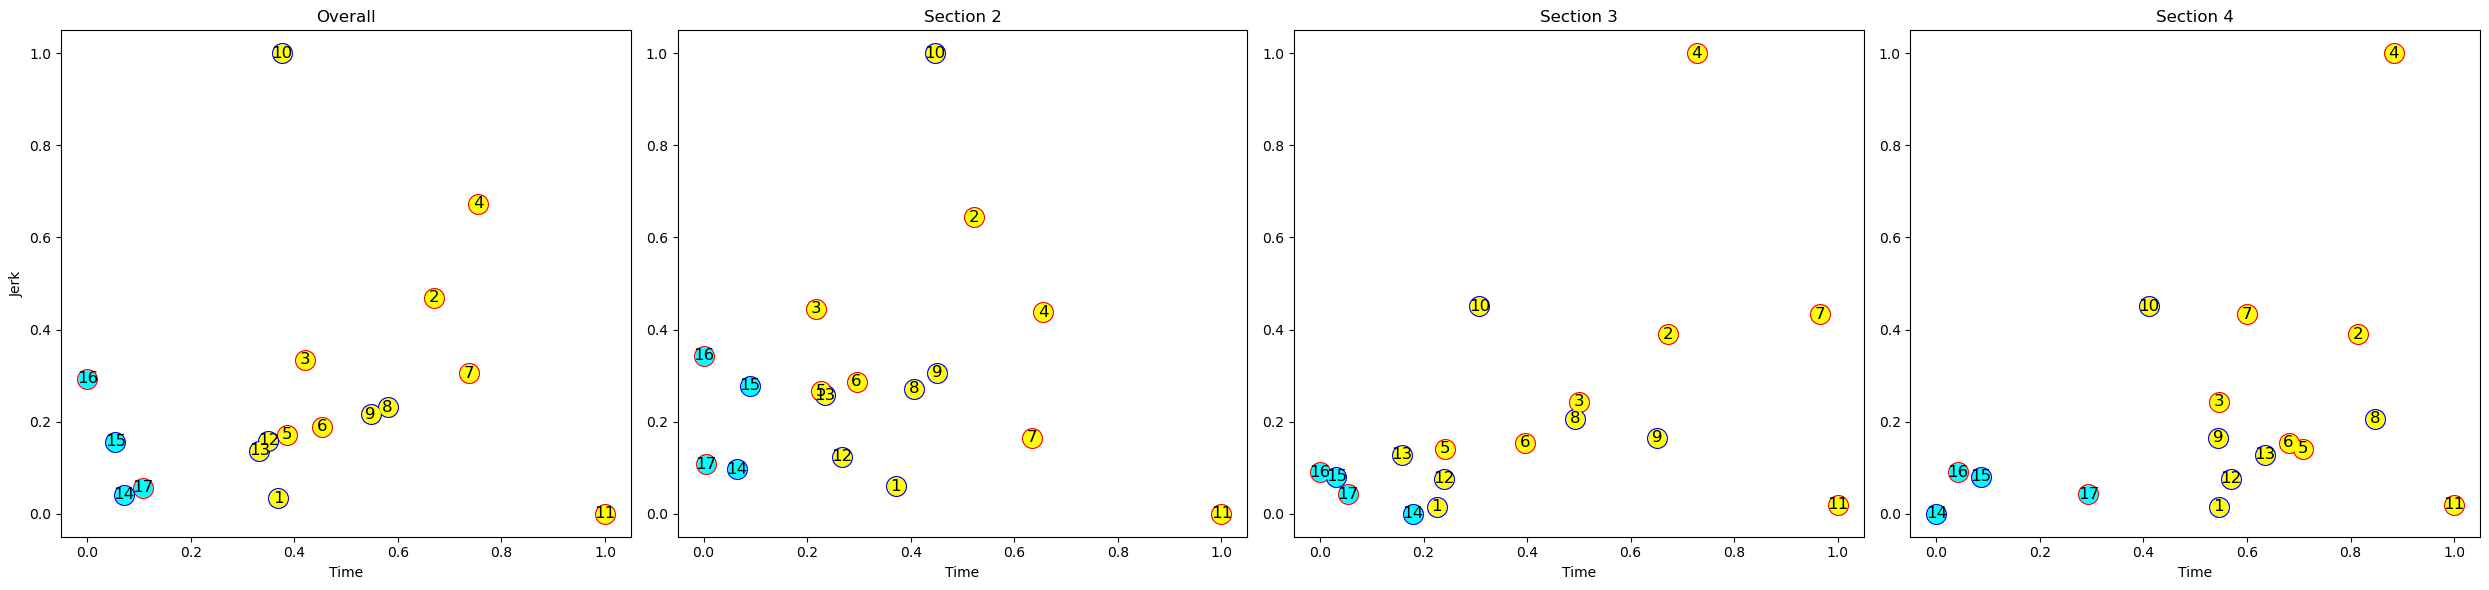

In [7]:
def plotSections2Cluster(overall, section_1, section_2, section_3, xlabel, ylabel):
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(overall)
    fig, axs = plt.subplots(1, 4, figsize=(25, 6))

    datasets = [overall, section_1, section_2, section_3]
    
    for j, dataset in enumerate(datasets):
        c = 0
        for cluster_label in range(2):
            markers = ['o', 'o']  # Using circles for all points
            cluster_data = dataset[kmeans.labels_ == cluster_label]
            for i, point in enumerate(cluster_data):
                color = 'cyan' if cluster_label == 1 else 'yellow'  # Class 1 in cyan, class 0 in pink
                axs[j].scatter(point[0], point[1], marker=markers[cluster_label], color=color, s=150)
                axs[j].text(point[0], point[1], str(c+1), fontsize=12, ha='center', va='center')  # Add person name to each point
                c += 1

            axs[j].scatter(dataset[(gender == 'female') & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 'female') & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='red', linewidth=1, facecolors='none', s=200, label='Female', zorder=0)
            axs[j].scatter(dataset[(gender == 'male') & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 'male') & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='blue', linewidth=1, facecolors='none', s=200, label='Male', zorder=0)

        axs[j].set_xlabel(xlabel)
        axs[j].set_title('Section {}'.format(j+1))  # Set titles for each subplot
    axs[0].set_ylabel(ylabel)
    axs[0].set_title('Overall')  # Set title for the first subplot

    plt.tight_layout()
    plt.show()

# Example usage:

plotSections2Cluster(data, data_1, data_2, data_3, 'Time', 'Jerk')


# Time and Jerk Y

In [8]:
time_jerk_y_data = np.array([[t, j] for t, j in zip(time, jerk_y)])
time_jerk_y_data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_y_1)])
time_jerk_y_data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_y_2)])
time_jerk_y_data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_y_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 2 males
Cluster 1: 2 females, 6 males


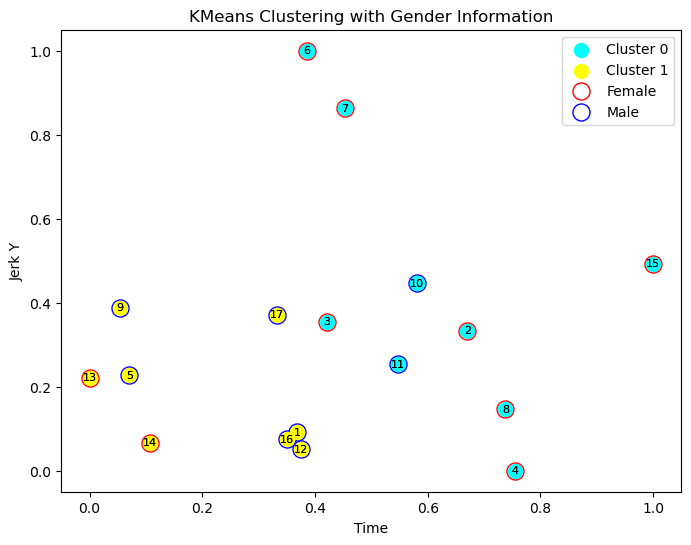

In [9]:
plotGender2Clusters(time_jerk_y_data, 'Time', 'Jerk Y')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


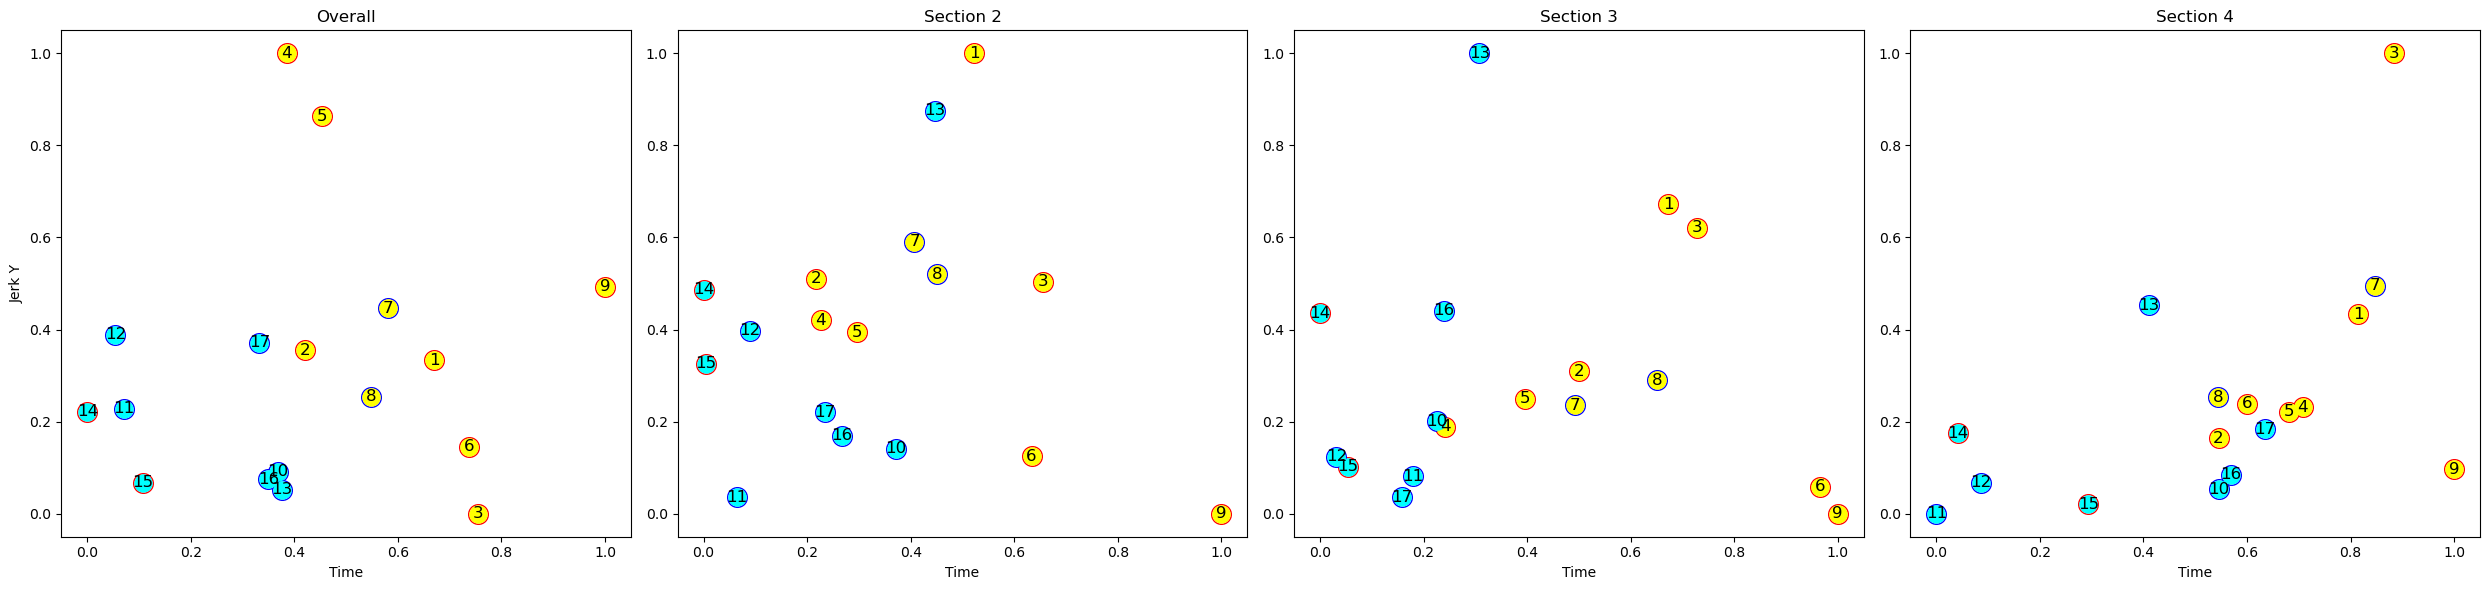

In [10]:
plotSections2Cluster(time_jerk_y_data, time_jerk_y_data_1, time_jerk_y_data_2, time_jerk_y_data_3, 'Time', 'Jerk Y')

# Time and Peaks

In [11]:
time_peaks_data = np.array([[t, j] for t, j in zip(time, peaks)])
time_peaks_data_1 = np.array([[t, j] for t, j in zip(time_1, peaks_1)])
time_peaks_data_2 = np.array([[t, j] for t, j in zip(time_2, peaks_2)])
time_peaks_data_3 = np.array([[t, j] for t, j in zip(time_3, peaks_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 5 females, 2 males
Cluster 1: 4 females, 6 males


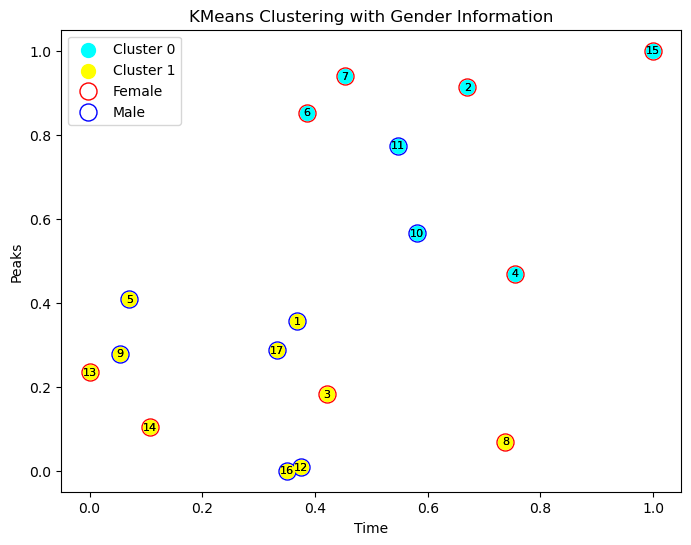

In [12]:
plotGender2Clusters(time_peaks_data, 'Time', 'Peaks')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


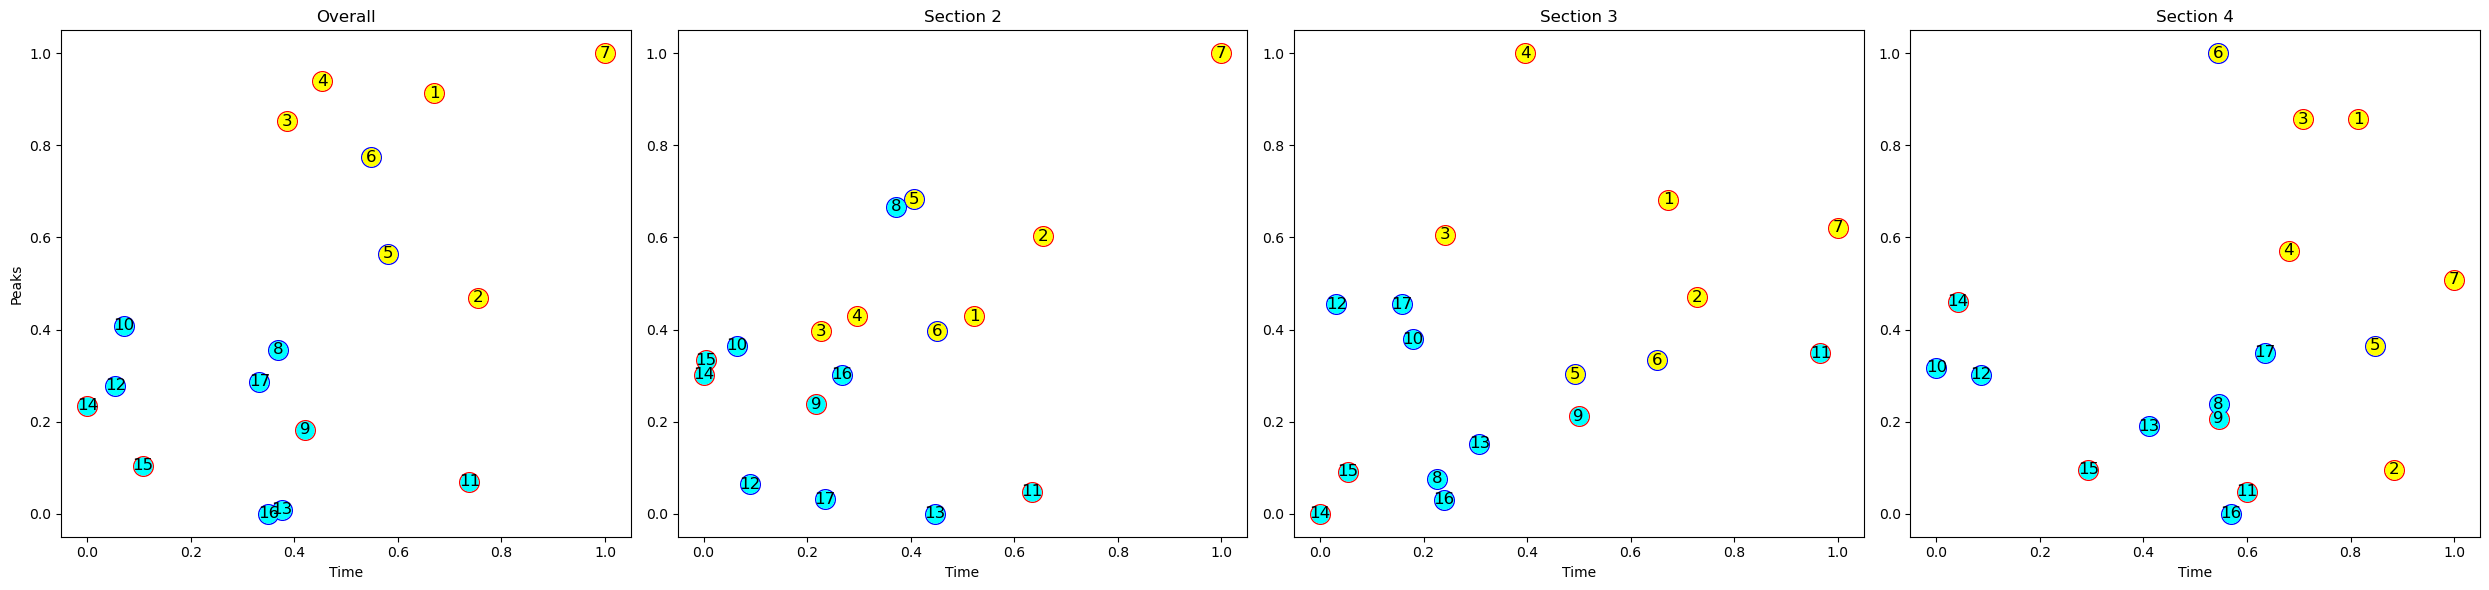

In [13]:
plotSections2Cluster(time_peaks_data, time_peaks_data_1, time_peaks_data_2, time_peaks_data_3, 'Time', 'Peaks')

# Anthropometric

## Height

In [14]:
height_time =  np.array([[t, j] for t, j in zip(height, time)])
height_peaks = np.array([[t, j] for t, j in zip(height, peaks)])
height_level = np.array([[t, j] for t, j in zip(height, level)])
height_jerk = np.array([[t, j] for t, j in zip(height, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 8 females, 7 males
Cluster 1: 1 females, 1 males
Cluster 0: 2 females, 6 males
Cluster 1: 7 females, 2 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 4 females, 2 males
Cluster 1: 5 females, 6 males
Cluster 0: 7 females, 6 males
Cluster 1: 2 females, 2 males


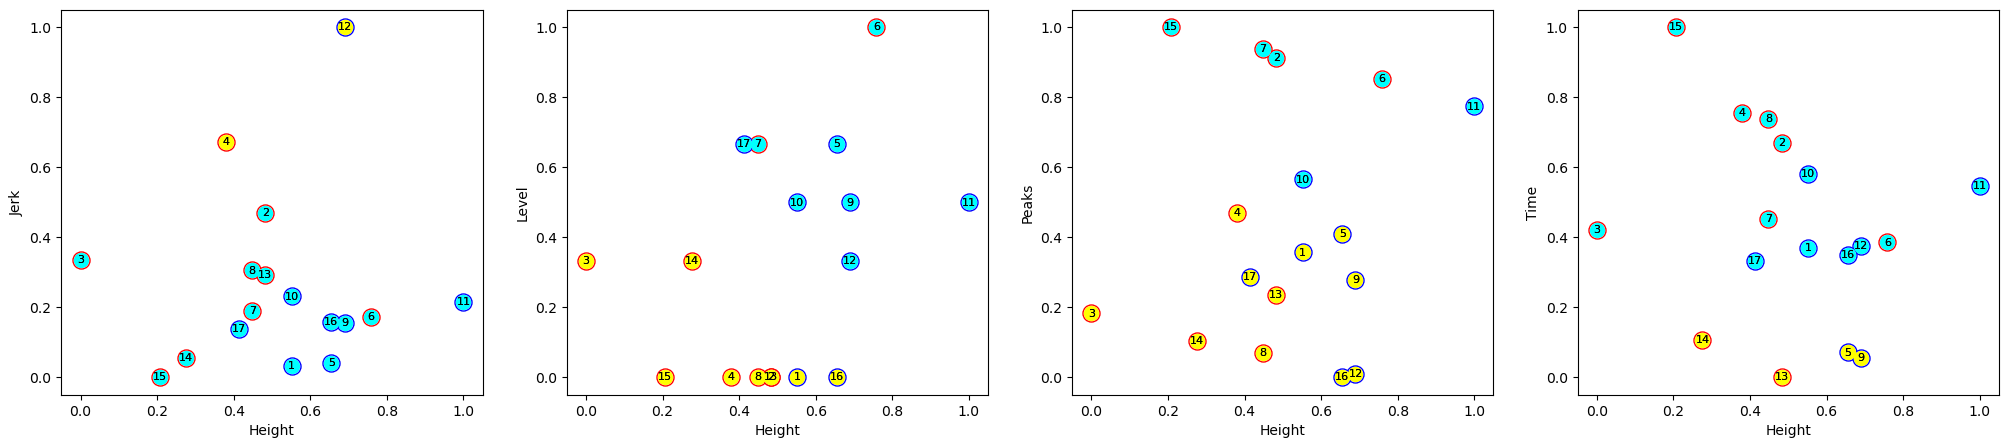

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [15]:
def subPlotGender2Clusters(axs, data, xlabel, ylabel):   
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)
    # Gender based counting per cluster
    female_counts = {}
    male_counts = {}

    # Iterate over each cluster
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        
        female_counts[cluster_label] = np.sum((gender == 'female') & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 'male') & (kmeans.labels_ == cluster_label))

    # Print
    for cluster_label in range(2):
        print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

    # Plot
    colors = ['cyan', 'yellow']
    plt.figure(figsize=(8, 6))
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        axs.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

    # Annotate each point with person's name
        for i, point in enumerate(data):
            numeric_name = person_name[i][1:]
            axs.text(point[0], point[1], numeric_name, fontsize=8, ha='center', va='center')


    # Add Gender information
    axs.scatter(data[(gender == 'female'), 0], data[(gender == 'female'), 1], c='white', marker='o', edgecolor='red', label='Female', s=150, zorder=0)
    axs.scatter(data[(gender == 'male'), 0], data[(gender == 'male'), 1], c='white', marker='o', edgecolor='blue', label='Male', s=150, zorder=0)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)

fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], height_jerk, 'Height', 'Jerk')
subPlotGender2Clusters(axs[1], height_level, 'Height', 'Level')
subPlotGender2Clusters(axs[2], height_peaks, 'Height', 'Peaks')
subPlotGender2Clusters(axs[3], height_time, 'Height', 'Time')
plt.show()

## Level

In [16]:
level_time =  np.array([[t, j] for t, j in zip(height, time)])
level_peaks = np.array([[t, j] for t, j in zip(height, peaks)])
level_height = np.array([[t, j] for t, j in zip(height, level)])
level_jerk = np.array([[t, j] for t, j in zip(height, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 6 males
Cluster 1: 2 females, 2 males
Cluster 0: 4 females, 2 males
Cluster 1: 5 females, 6 males
Cluster 0: 2 females, 6 males
Cluster 1: 7 females, 2 males
Cluster 0: 8 females, 7 males
Cluster 1: 1 females, 1 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


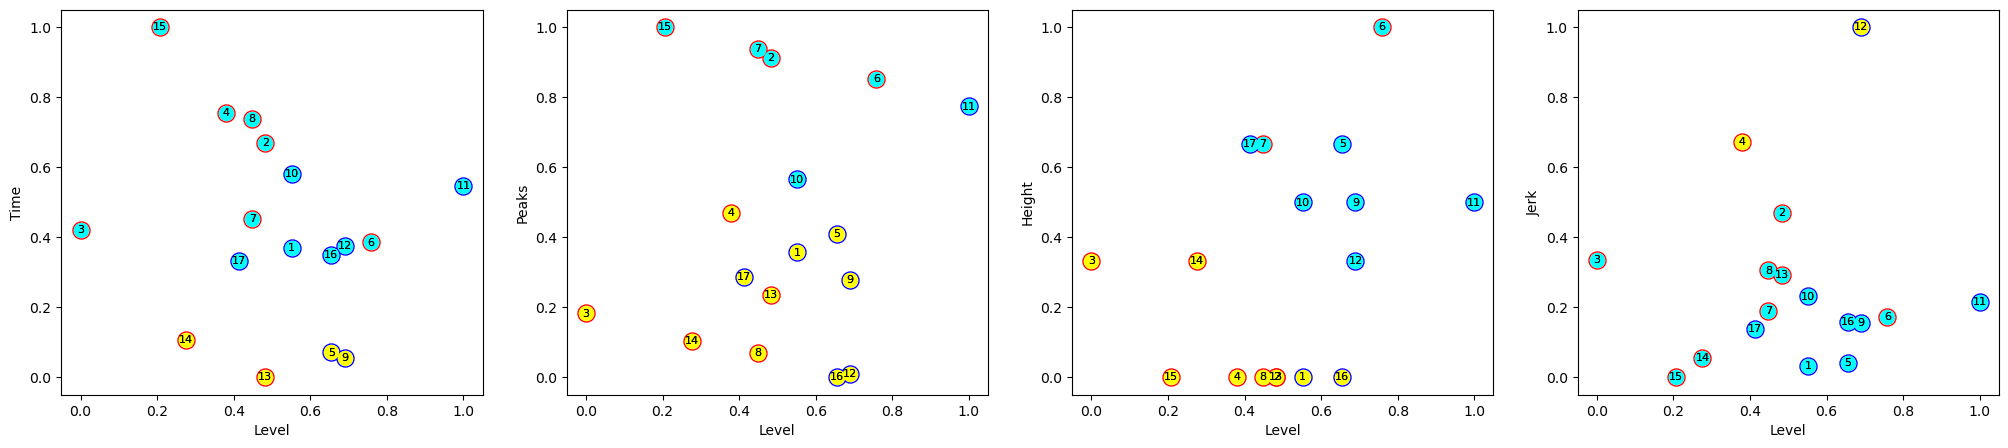

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], level_time, 'Level', 'Time')
subPlotGender2Clusters(axs[1], level_peaks, 'Level', 'Peaks')
subPlotGender2Clusters(axs[2], level_height, 'Level', 'Height')
subPlotGender2Clusters(axs[3], level_jerk, 'Level', 'Jerk')
plt.show()

## Experience

In [18]:
experience_time =  np.array([[t, j] for t, j in zip(experience, time)])
experience_peaks = np.array([[t, j] for t, j in zip(experience, peaks)])
experience_height = np.array([[t, j] for t, j in zip(experience, level)])
experience_jerk = np.array([[t, j] for t, j in zip(experience, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 5 males
Cluster 1: 2 females, 3 males
Cluster 0: 5 females, 2 males
Cluster 1: 4 females, 6 males
Cluster 0: 4 females, 6 males
Cluster 1: 5 females, 2 males
Cluster 0: 7 females, 6 males
Cluster 1: 2 females, 2 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


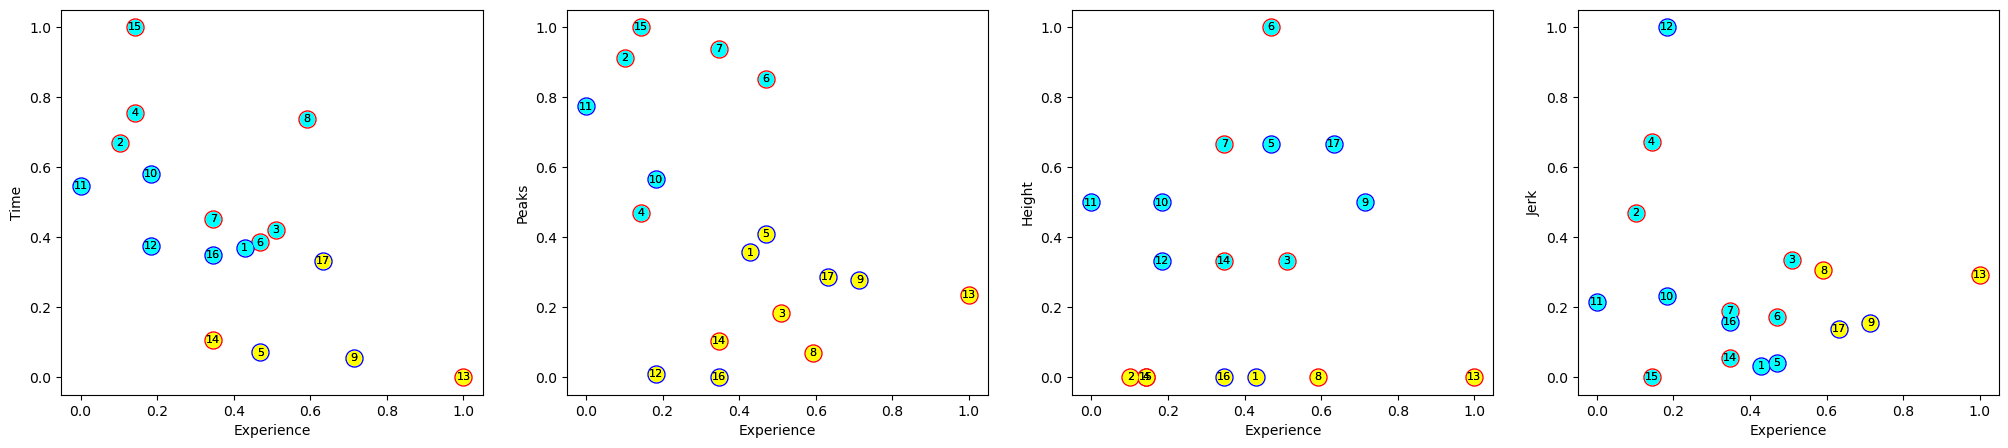

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], experience_time, 'Experience', 'Time')
subPlotGender2Clusters(axs[1], experience_peaks, 'Experience', 'Peaks')
subPlotGender2Clusters(axs[2], experience_height, 'Experience', 'Height')
subPlotGender2Clusters(axs[3], experience_jerk, 'Experience', 'Jerk')
plt.show()

## Training

In [20]:
training_time =  np.array([[t, j] for t, j in zip(training, time)])
training_peaks = np.array([[t, j] for t, j in zip(training, peaks)])
training_height = np.array([[t, j] for t, j in zip(training, level)])
training_jerk = np.array([[t, j] for t, j in zip(training, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 7 females, 3 males
Cluster 1: 2 females, 5 males
Cluster 0: 4 females, 2 males
Cluster 1: 5 females, 6 males
Cluster 0: 4 females, 5 males
Cluster 1: 5 females, 3 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 8 females, 7 males
Cluster 1: 1 females, 1 males


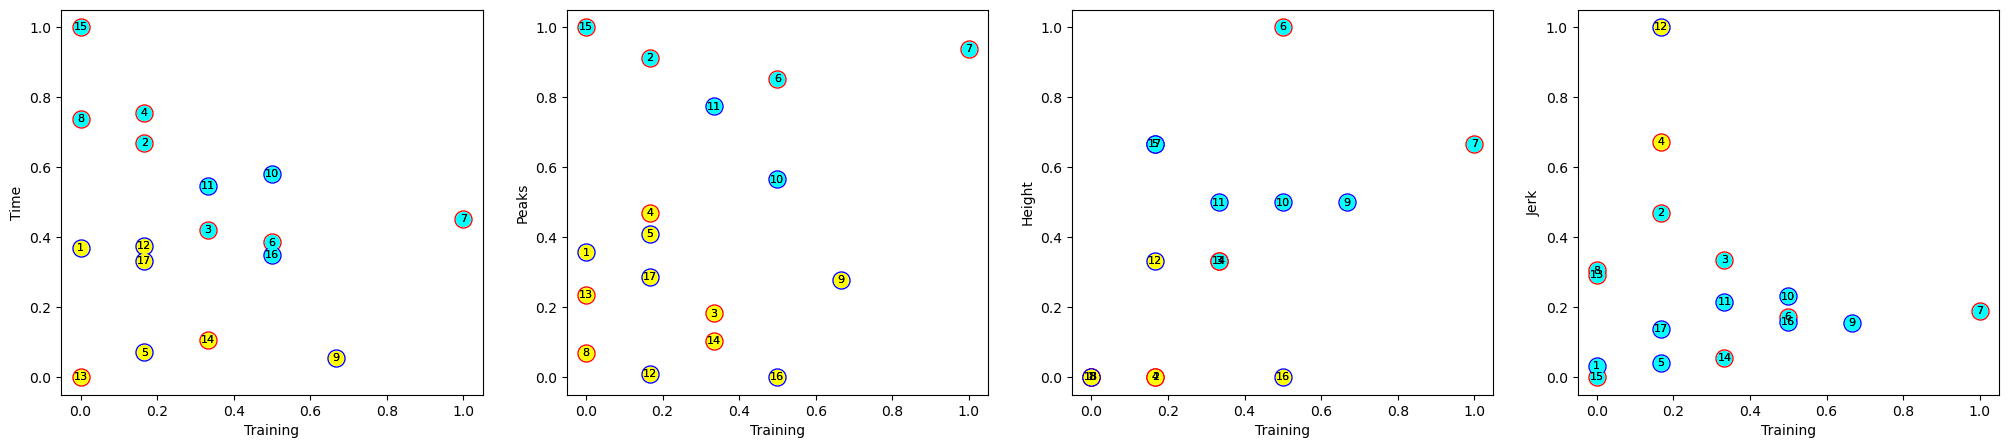

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], training_time, 'Training', 'Time')
subPlotGender2Clusters(axs[1], training_peaks, 'Training', 'Peaks')
subPlotGender2Clusters(axs[2], training_height, 'Training', 'Height')
subPlotGender2Clusters(axs[3], training_jerk, 'Training', 'Jerk')
plt.show()

# Grasping

In [22]:
grasping_time =  np.array([[t, j] for t, j in zip(grasping_performance, time)])
grasping_peaks = np.array([[t, j] for t, j in zip(grasping_performance, peaks)])
grasping_level = np.array([[t, j] for t, j in zip(grasping_performance, level)])
grasping_jerk = np.array([[t, j] for t, j in zip(grasping_performance, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 8 females, 7 males
Cluster 1: 1 females, 1 males
Cluster 0: 4 females, 6 males
Cluster 1: 5 females, 2 males
Cluster 0: 4 females, 2 males
Cluster 1: 5 females, 6 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: 4 females, 2 males
Cluster 1: 5 females, 6 males


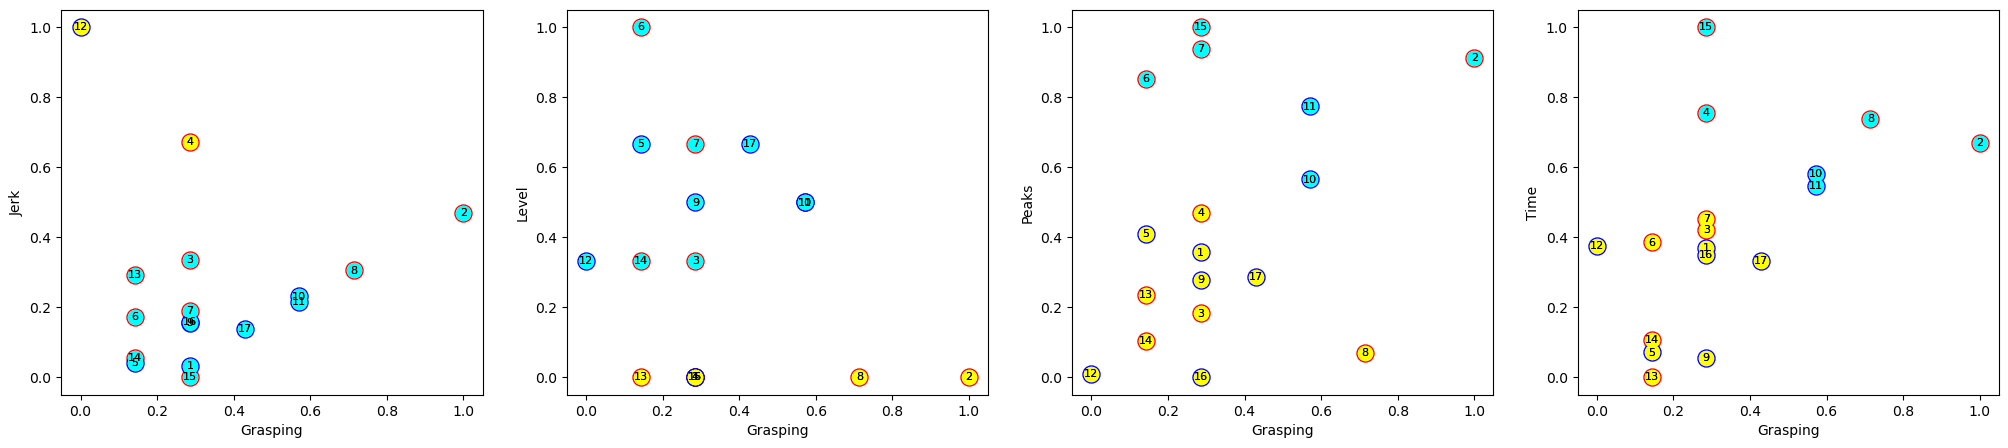

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], grasping_jerk, 'Grasping', 'Jerk')
subPlotGender2Clusters(axs[1], grasping_level, 'Grasping', 'Level')
subPlotGender2Clusters(axs[2], grasping_peaks, 'Grasping', 'Peaks')
subPlotGender2Clusters(axs[3], grasping_time, 'Grasping', 'Time')
plt.show()

In [24]:
data = np.array([[t, j, p, e, l, tr] for t, j, p, e, l, tr in zip(time, jerk, peaks, experience, level, training)])
print(data)
clusters = 2
kmeans = KMeans(n_clusters=clusters, random_state=0, n_init='auto').fit(data)

female_counts = {}
male_counts = {}

for cluster_label in range(clusters):
        cluster_data = data[kmeans.labels_ == cluster_label]
        
        female_counts[cluster_label] = np.sum((gender == 'female') & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 'male') & (kmeans.labels_ == cluster_label))
        print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")
    

[[0.36857477 0.03305085 0.35652174 0.42857143 0.         0.        ]
 [0.67012266 0.4688006  0.91304348 0.10204082 0.         0.16666667]
 [0.42041472 0.33429514 0.1826087  0.51020408 0.33333333 0.33333333]
 [0.75481893 0.67344224 0.46956522 0.14285714 0.         0.16666667]
 [0.07067757 0.04152042 0.40869565 0.46938776 0.66666667 0.16666667]
 [0.38522196 0.17163571 0.85217391 0.46938776 1.         0.5       ]
 [0.45327103 0.18912096 0.93913043 0.34693878 0.66666667 1.        ]
 [0.73787967 0.30545488 0.06956522 0.59183673 0.         0.        ]
 [0.05446846 0.15592456 0.27826087 0.71428571 0.5        0.66666667]
 [0.58016939 0.23122876 0.56521739 0.18367347 0.5        0.5       ]
 [0.54760514 0.21598405 0.77391304 0.         0.5        0.33333333]
 [0.37587617 1.         0.00869565 0.18367347 0.33333333 0.16666667]
 [0.         0.29342448 0.23478261 1.         0.         0.        ]
 [0.10689252 0.05620824 0.10434783 0.34693878 0.33333333 0.33333333]
 [1.         0.         1.        

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
